In [1]:
import warnings
warnings.filterwarnings('ignore')

from util_clustering import *

plt.rcParams.update({'font.size': 18, 'figure.figsize': (10, 7)})

# create_synthetic_data() # Run this once to create the data folder

In [2]:
from util import *
from util_montage import *

### Changed these two lines to hardcode paths for easier running
data_path = "/Users/samm/Documents/Coding/github/RNA_SPT_in_cellular_condensates/data"

debug = False

if debug:
    print(f"Selected folder: {data_path}")

if not data_path:
    if debug:
        print("❌ No folder selected. Exiting...")
    exit()

# Execute file matching and loading
if debug:
    print("🔄 Finding and matching files...")
file_pairs = find_matching_files(data_path)

if not file_pairs:
    if debug:
        print("❌ No matching file pairs found!")
    pass
else:
    if debug:
        print(f"📂 Loading {len(file_pairs)} experiment datasets...")
    
    all_tracks = []
    all_condensates = []
    
    for rna_path, condensate_path, exp_name in track(file_pairs, description="Loading datasets"):
        df_tracks, df_condensates = load_dataset_pair(rna_path, condensate_path, exp_name)
        
        if df_tracks is not None and df_condensates is not None:
            all_tracks.append(df_tracks)
            all_condensates.append(df_condensates)
    
    if all_tracks and all_condensates:
        # Combine all datasets
        df_tracks_combined = pd.concat(all_tracks, ignore_index=True)
        df_condensates_combined = pd.concat(all_condensates, ignore_index=True)

        if debug:
            print(f"✅ Successfully loaded and combined:")
            print(f"   - {len(df_tracks_combined)} total track points")
            print(f"   - {len(df_condensates_combined)} total condensate entries")
            print(f"   - {df_tracks_combined['experiment'].nunique()} experiments")

        # Display summary statistics
        if debug:
            print("\n📊 Dataset Summary:")
        for exp in df_tracks_combined['experiment'].unique():
            exp_tracks = df_tracks_combined[df_tracks_combined['experiment'] == exp]
            exp_condensates = df_condensates_combined[df_condensates_combined['experiment'] == exp]
            if debug:
                print(f"   {exp}: {exp_tracks['trackID'].nunique()} tracks, "
                      f"{len(exp_condensates)} condensate entries")
    else:
        if debug:
            print("❌ No valid datasets were loaded successfully")
        pass

if debug:
    print("\n🎉 Data loading complete!")

Output()

[WARNING] No condensate files found for experiment: 20220508-FLmRNA-1x-FOV-6


In [3]:
# experiment_results = analyze_interactions_all_experiments(
#     df_tracks_combined, 
#     df_condensates_combined, 
#     proximity_threshold=0)

In [4]:
# df_condensates_combined.head()

In [5]:
# df_tracks_combined.tail()

In [6]:
common_time = np.linspace(0, 20, 100)  # Common time vector for interpolation

Found 1 files matching pattern '2x' in result.
Loaded 20220508-FLmRNA_2x.csv with 8359 tracks.
Data prepared successfully. Matrix shape: (8359, 100)
Number of original traces: 8359
Elbow point at index 5611 with last time 4.10s
Setting t_max to 4 seconds based on CDF analysis.
Filtered data matrix shape: (3431, 30)
Filtered traces shape: 3431


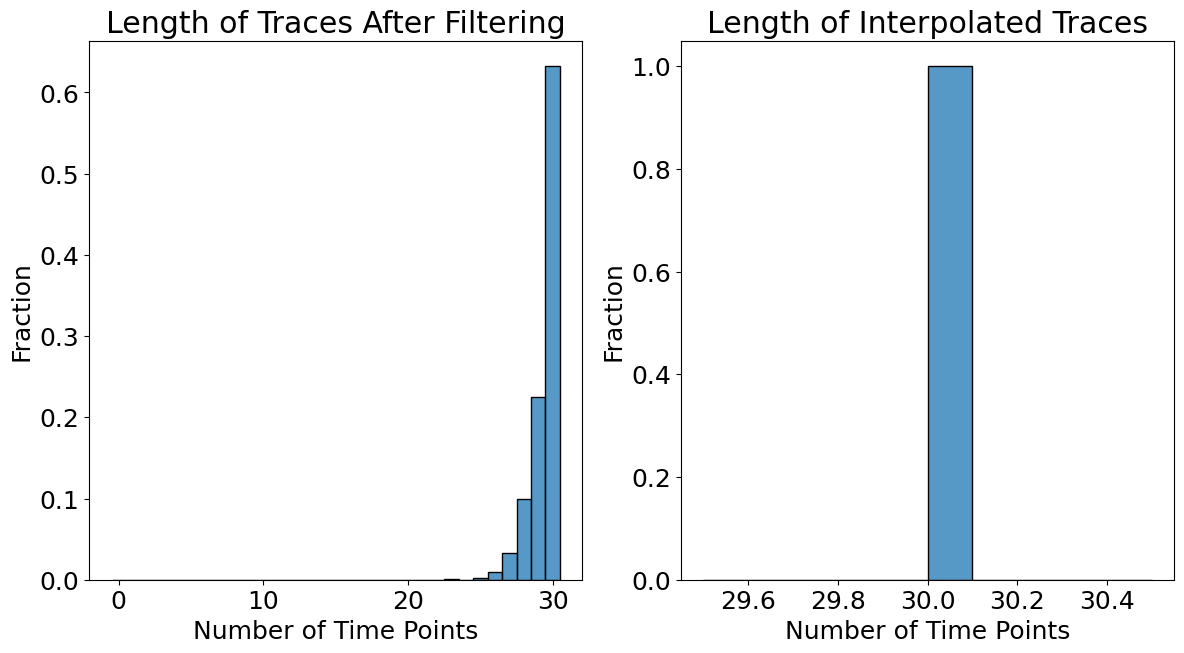

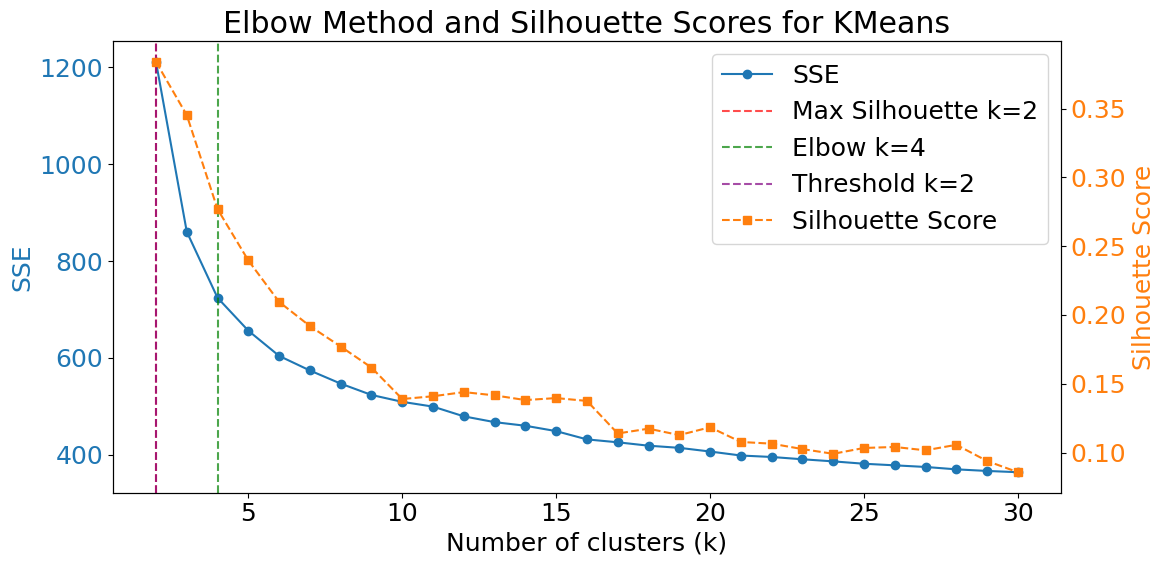

Optimal k recommendations:
  Max Silhouette Score: 2
  Elbow Method: 4
  Silhouette Threshold: 2

Recommended k: 4
Assigned data to 4 clusters using KMeans.
Cluster 0: 930 traces (27.1%)
Cluster 1: 895 traces (26.1%)
Cluster 2: 525 traces (15.3%)
Cluster 3: 1081 traces (31.5%)
Total traces: 3431


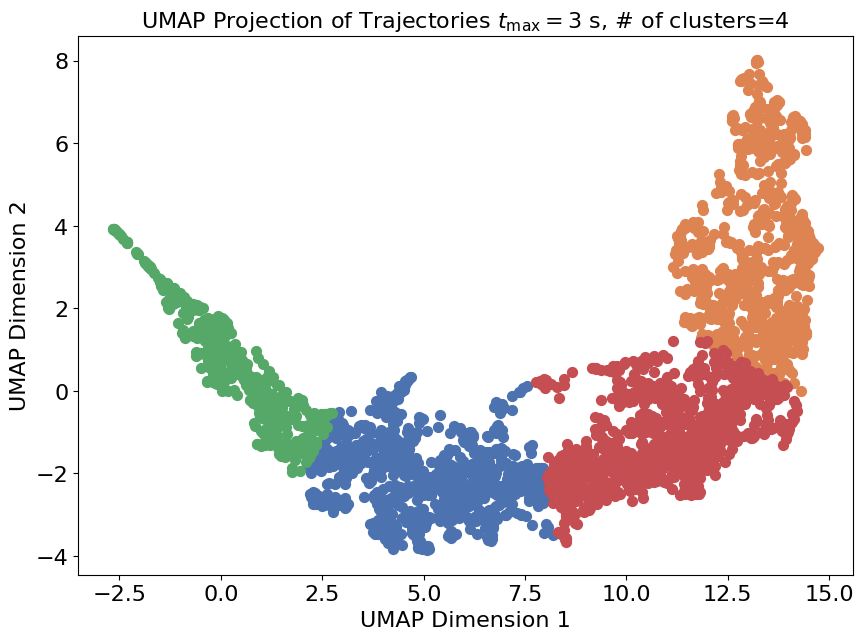

Cluster 0: Closest trace index 3156 with max distance 0.02 μm
Cluster 1: Closest trace index 1633 with max distance 0.59 μm
Cluster 2: Closest trace index 2837 with max distance -0.03 μm
Cluster 3: Closest trace index 2739 with max distance 0.11 μm


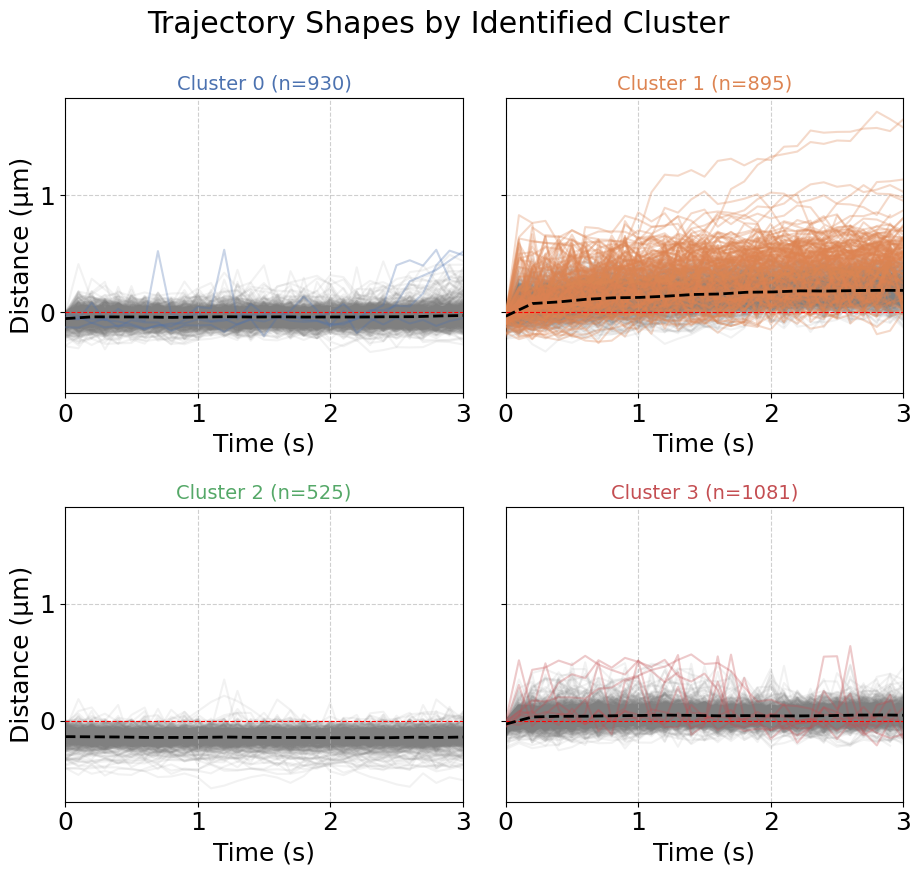

In [7]:
# Load your data
# Make sure your files are in a folder named 'sample_trajectories' or change the path
try:
    data_matrix, original_traces = load_and_prepare_trajectories('result', common_time=common_time, file_pattern='2x')
    print(f"Data prepared successfully. Matrix shape: {data_matrix.shape}")
    
    # Print the shape of the original traces
    print(f"Number of original traces: {len(original_traces)}")
    
    first_time_list, last_time_list = find_duration_histogram(original_traces)

    t_max = find_trajectory_elbow_point(original_traces, show_plot=False)

    t_max = 3  # Set a maximum time threshold based on the CDF analysis
    
    data_matrix, filtered_traces, length_matrix, interp_length_matrix = filter_and_interpolate_traces(original_traces, t_max=t_max, show_plot=True)
    
    # Find the optimal number of clusters
    optimal_results = optimal_kmeans(data_matrix, max_k=30)
    print(f"Optimal k recommendations:")
    print(f"  Max Silhouette Score: {optimal_results['max_silhouette']}")
    print(f"  Elbow Method: {optimal_results['elbow']}")
    print(f"  Silhouette Threshold: {optimal_results['threshold']}")

    # Use the max silhouette score as default
    optimal_k = optimal_results['elbow']
    print(f"\nRecommended k: {optimal_k}")
    
    cluster_labels, embedding, cluster_reps = perform_clustering(data_matrix,
                                                                            filtered_traces,
                                                                            optimal_k,
                                                                            n_neighbors=5,
                                                                            t_max=t_max,
                                                                            plot_cluster=True,
                                                                            plot_rep=False)
    
except FileNotFoundError:
    print("Error: 'sample_trajectories' folder not found. Please create it and add your data files, or run the `create_synthetic_data()` function first.")

Cluster 0 representative trajectory: 20220508-FLmRNA_2x_FOV-22, Track ID: 6
🔍 Analyzing interactions for each experiment:
  Processing: 20220508-FLmRNA_2x_FOV-22


Output()

Processing montage for: 20220508-FLmRNA_2x_FOV-22

    ✅ 1/1 tracks interacting with 599 condensates
📊 Creating condensate montages for 1 experiments...
   Maximum condensates per montage: 104


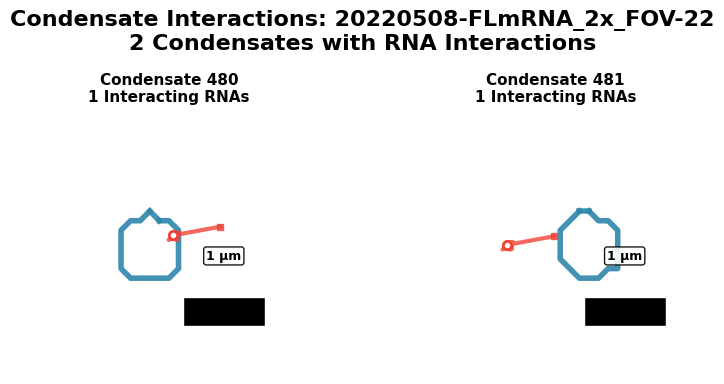

✅ Saved: condensate_montage_20220508-FLmRNA_2x_FOV-22.png

🎉 All individual condensate montages created!
Cluster 1 representative trajectory: 20220508-FLmRNA_2x_FOV-23, Track ID: 2757
🔍 Analyzing interactions for each experiment:
  Processing: 20220508-FLmRNA_2x_FOV-23


Output()

Processing montage for: 20220508-FLmRNA_2x_FOV-23

    ✅ 1/1 tracks interacting with 551 condensates
📊 Creating condensate montages for 1 experiments...
   Maximum condensates per montage: 104


Found 1 condensates with interactions

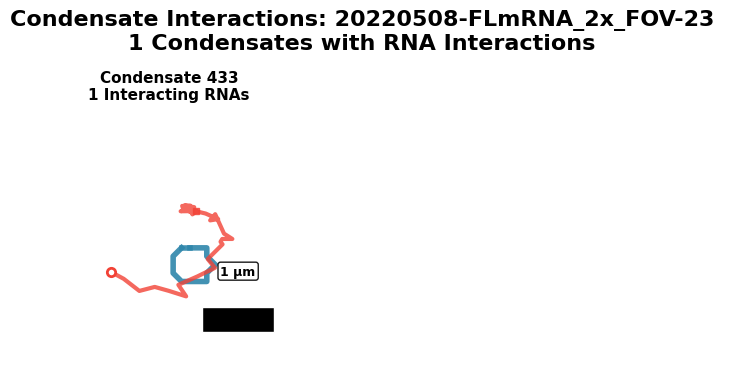

✅ Saved: condensate_montage_20220508-FLmRNA_2x_FOV-23.png

🎉 All individual condensate montages created!
Cluster 2 representative trajectory: 20220508-FLmRNA_2x_FOV-12, Track ID: 211
🔍 Analyzing interactions for each experiment:
  Processing: 20220508-FLmRNA_2x_FOV-12


Output()

Processing montage for: 20220508-FLmRNA_2x_FOV-12

    ✅ 1/1 tracks interacting with 722 condensates
📊 Creating condensate montages for 1 experiments...
   Maximum condensates per montage: 104


Found 1 condensates with interactions

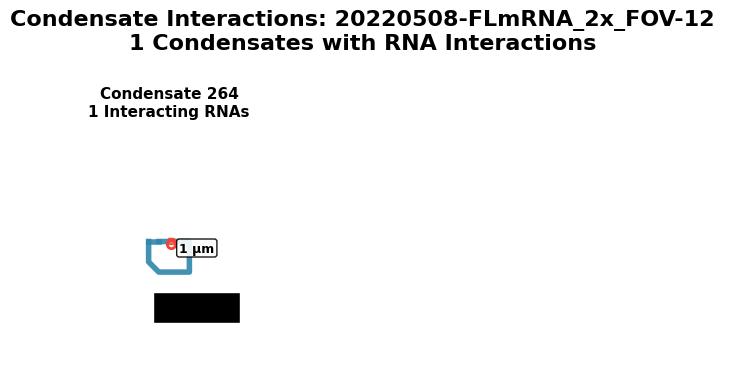

✅ Saved: condensate_montage_20220508-FLmRNA_2x_FOV-12.png

🎉 All individual condensate montages created!
Cluster 3 representative trajectory: 20220508-FLmRNA_2x_FOV-8, Track ID: 492
🔍 Analyzing interactions for each experiment:
  Processing: 20220508-FLmRNA_2x_FOV-8
    ✅ 1/1 tracks interacting with 682 condensates
📊 Creating condensate montages for 1 experiments...
   Maximum condensates per montage: 104


Output()

Processing montage for: 20220508-FLmRNA_2x_FOV-8

Found 1 condensates with interactions

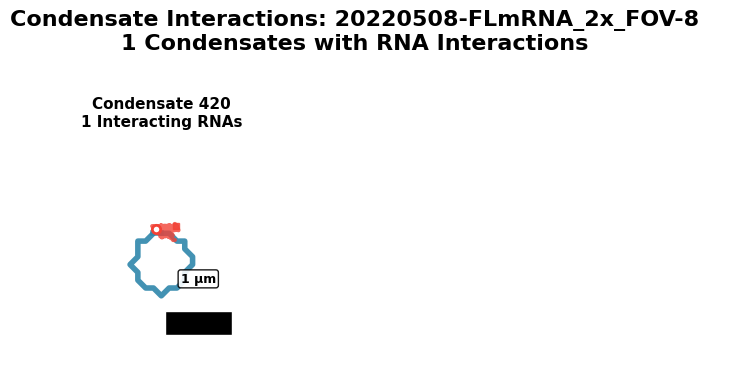

✅ Saved: condensate_montage_20220508-FLmRNA_2x_FOV-8.png

🎉 All individual condensate montages created!


In [11]:
# Plot the representative trajectories snapshots
for cluster_id, rep_trace in cluster_reps.items():
    exp, track_id = rep_trace['experiment'].iloc[0], rep_trace['trackID'].iloc[0]

    print(f"Cluster {cluster_id} representative trajectory: {exp}, Track ID: {track_id}")
    # Locate the condensate_df and track_df for this experiment
    try:
        track_df = df_tracks_combined[(df_tracks_combined['experiment'] == exp) & (df_tracks_combined['trackID'] == track_id)]
        condensate_df = df_condensates_combined[df_condensates_combined['experiment'] == exp]
        
        try:
            experiment_result = legacy_analyze_interactions(track_df, condensate_df, proximity_threshold=1)
            create_individual_experiment_montages(track_df, condensate_df, experiment_result, zoom_margin=10, montage_cols=2)
            pass
        except Exception as e:
            print(f"Error analyzing interactions for {exp}, Track ID: {track_id}: {e}")
            continue
        
    except KeyError:
        print(f"Error: Experiment {exp} not found in the combined dataframes.")
        continue